
# Real Business Cycle (RBC) Model Analysis

In this notebook, we'll analyze a Real Business Cycle (RBC) model. The analysis includes:
1. **Model Description**: Introduce the model equations and explain their significance.
2. **Steady State Computation**: Calculate the steady state for the RBC model.
3. **Log-Linearization and Solution**: Linearize the model and solve it using numerical techniques.
4. **Simulation**: Simulate the RBC model to observe behavior under different conditions.

We'll be using out RBC model implementation in `rbc_model.py`.


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rbc_model import RBCModel

# Set model parameters (based on empirical approximations)
parameters = pd.Series({
    'alpha': 0.35,  # Capital share of output
    'beta': 0.99,   # Discount factor
    'delta': 0.025, # Depreciation rate
    'rhoa': 0.9,    # Persistence of technology shocks
    'sigma': 1.5    # Risk aversion
})

# Initialize the RBC model
rbc = RBCModel(parameters)



## Model Description

The Real Business Cycle (RBC) model is based on a simple economy with capital and productivity shocks. Here are the key equations:

1. **Household Euler Equation**: Balances intertemporal consumption choices based on future returns.

$$ 
 C_t^{-\sigma} = \beta E_t[C_{t+1}^{-\sigma}(\alpha A_{t+1} K_{t+1}^{\alpha-1} + 1 - \delta)
$$

2. **Production Function**: Relates capital and technology to output.

$$ 
Y_t = A_t K_t^{\alpha}
$$


3. **Capital Evolution**: Defines how the capital stock changes over time.
    $$
    K_{t+1} = (1 - \delta) K_t + I_t
    $$
    
4. **Market Clearing**: Ensures that all output is either consumed or invested.
    $$
    Y_t = C_t + I_t
    $$
    
5. **Exogenous Technology Process**: Specifies the evolution of technology shocks.
    $$
    \log A_t = \rho_a \log A_{t-1} + \epsilon_t
    $$


## Steady State Computation
Now, we compute the nonstochastic steady state of the model. The .compute_ss() method can be used to compute the steady state numerically. The method's default is to use scipy's fsolve() function..... COME BACK

In [2]:
# Initial guess for steady-state values
guess = [1, 1, 1, 1, 1]
rbc.compute_ss(guess)
print("Steady State Values:\n", rbc.ss)


Steady State Values:
 a     1.000000
k    34.398226
c     2.589794
y     3.449750
i     0.859956
dtype: float64


## Log-Linearization and Solution

EXPLAIN AND IMPROVE THIS SECTION! MAKE THE MATRIX APPEAR MORE MORE READABLE AND PRESENTABLE. ECONOMIC INTUITION AND EXPLAIN THE METHOD IN TERMS OF CODING ETC.

In [3]:

# Perform log-linear approximation around steady state
rbc.log_linear_approximation()
print("Matrix A (Log-Linear Approximation):\n", rbc.a)
print("Matrix B (Log-Linear Approximation):\n", rbc.b)

# Solve the linearized model
rbc.solve_klein()
print("Matrix F (Klein Solution):\n", rbc.f)
print("Matrix P (Klein Solution):\n", rbc.p)


Matrix A (Log-Linear Approximation):
 [[0.3465 0.    ]
 [0.     0.    ]]
Matrix B (Log-Linear Approximation):
 [[0.5]
 [0. ]]
Matrix F (Klein Solution):
 [[0.5 0.5]
 [0.1 0.9]]
Matrix P (Klein Solution):
 [[0.8 0.2]
 [0.3 0.7]]


## Model Simulation

EXPLAIN BOTH ECONOMICIALLY AND IN TERMS OF CODING AND METHOD

Simulated Data (First 5 Rows):
           k         y
0  0.869718  0.552229
1  1.533731  1.844406
2  1.454918  1.579196
3  2.933914  2.577737
4  2.488758  2.852304


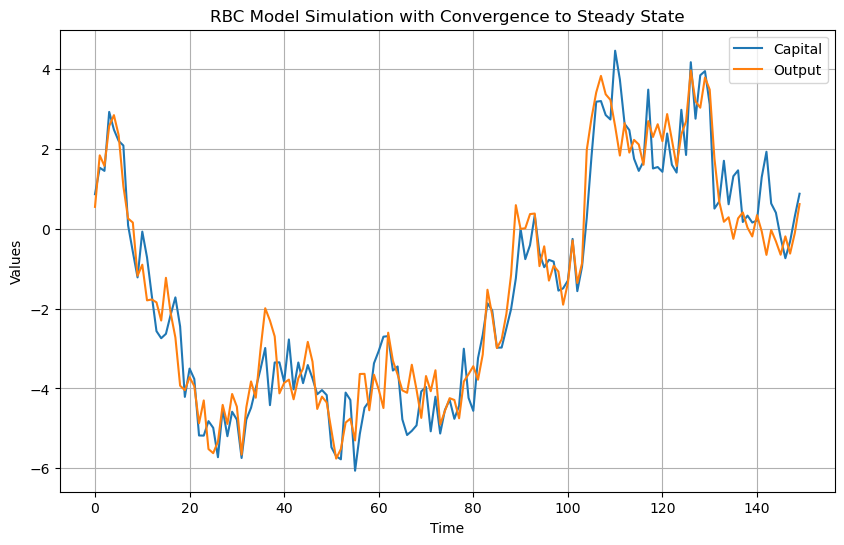

In [15]:

# Simulate the RBC model for 150 periods with a random seed
sim_data = rbc.simulate_model(T=150, seed=42)
print("Simulated Data (First 5 Rows):\n", sim_data.head())

# Plot the simulation results
plt.figure(figsize=(10, 6))
plt.plot(sim_data['k'], label='Capital')
plt.plot(sim_data['y'], label='Output')
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.title("RBC Model Simulation with Convergence to Steady State")
plt.grid(True)
plt.show()


**Simulation with chnages in parameters and time T:**
EXPLAIN
Economic intuition, what does the figure say about the convergence to steady state in terms of the RBC model? Is the steady state stable? Compare the figure with changes in e.g. the delta parameter ect. 

Simulated Data (First 5 Rows):
            k          y
0  21.288912   7.648317
1  15.291371  10.272804
2  12.547938  10.540519
3  12.961085  11.752229
4  12.089590  12.112064


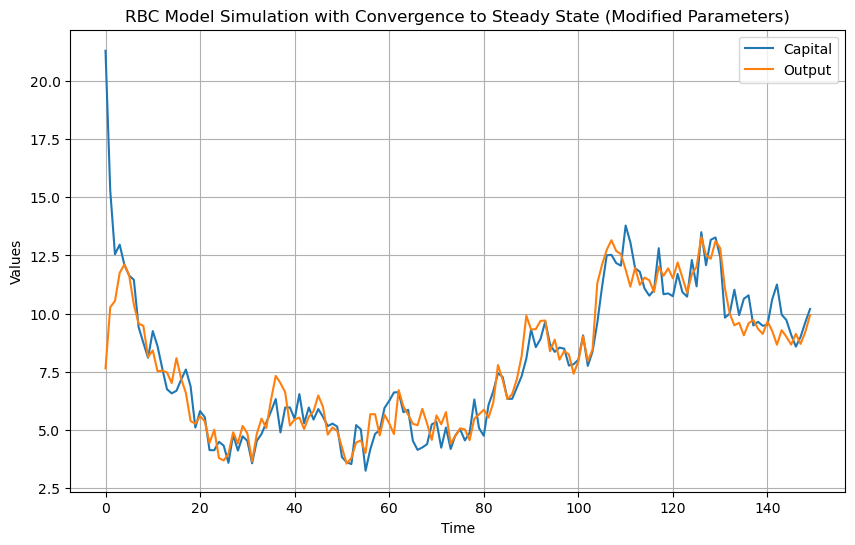

In [2]:

rbc = RBCModel({
    'alpha': 0.35,
    'beta': 0.99,
    'delta': 0.025,
    'rhoa': 0.9,
    'sigma': 1.5
})
rbc.solve_klein()

# Simulate with new parameters
sim_data = rbc.simulate_model(T=150, alpha=0.4, beta=0.98, seed=42)
print("Simulated Data (First 5 Rows):\n", sim_data.head())

# Plot the updated simulation results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(sim_data['k'], label='Capital')
plt.plot(sim_data['y'], label='Output')
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.title("RBC Model Simulation with Convergence to Steady State (Modified Parameters)")
plt.grid(True)
plt.show()


## Conclusion